# **Step 1. Import the data from the given .csv file**

In [26]:

import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


print(tf.__version__)



2.15.0


In [45]:
import pandas as pd

# Mounting Google Drive to access data file
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/hw1/diabetes.csv'


df = pd.read_csv(file_path, header=None)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0  


# **Step 2. Preprocess the data as you see fit and show basic data visualization**

In [46]:
print("sample records of the DataFrame:")
print(df.head())

sample records of the DataFrame:
          0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0  


In [47]:
# statistics of the columns
print("statistics of the columns:")
print(df.describe().T)

statistics of the columns:
   count      mean       std       min       25%       50%       75%  max
0  759.0 -0.407657  0.386260 -0.882353 -0.764706 -0.529412  0.000000  1.0
1  759.0  0.218563  0.306419 -0.557789 -0.005025  0.165829  0.407035  1.0
2  759.0  0.176505  0.201287 -0.606557  0.016393  0.180328  0.311475  1.0
3  759.0 -0.289735  0.258480 -0.858586 -0.494949 -0.292929  0.000000  1.0
4  759.0 -0.323534  0.375544 -0.966903 -0.716312  0.000000  0.000000  1.0
5  759.0 -0.032245  0.205376 -0.457526 -0.178837 -0.034277  0.087929  1.0
6  759.0 -0.663253  0.283056 -0.994876 -0.858241 -0.747225 -0.531597  1.0
7  759.0 -0.516162  0.400794 -0.966667 -0.866667 -0.633333 -0.233333  1.0
8  759.0  0.653491  0.476171  0.000000  0.000000  1.000000  1.000000  1.0


In [48]:

# missing value interpretation
print("Missing values in the Dataset:")
df.isnull().sum()


Missing values in the Dataset:


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64



```
Replacing 0 with mean of each column
```



In [49]:


df1=df.iloc[:, :-1]
column_means = df1.mean(skipna=True)

df1.replace(0, np.nan, inplace=True)
df1.fillna(column_means, inplace=True)
dataset_new = pd.concat([df1, df.iloc[:, -1]], axis=1)

print(dataset_new.head())

          0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929 -0.323534  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141 -0.323534 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180 -0.289735 -0.323534 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4 -0.407657  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3 -0.516162  1  
4 -0.600000  0  


In [50]:
print(dataset_new.describe().T)

   count      mean       std       min       25%       50%       75%  max
0  759.0 -0.467275  0.348284 -0.882353 -0.764706 -0.529412 -0.294118  1.0
1  759.0  0.220003  0.305901 -0.557789 -0.005025  0.175879  0.407035  1.0
2  759.0  0.184644  0.197514 -0.606557  0.049180  0.180328  0.311475  1.0
3  759.0 -0.375243  0.186234 -0.858586 -0.494949 -0.292929 -0.289735  1.0
4  759.0 -0.481678  0.254477 -0.966903 -0.716312 -0.323534 -0.323534  1.0
5  759.0 -0.032712  0.205339 -0.457526 -0.178837 -0.034277  0.087929  1.0
6  759.0 -0.664127  0.282028 -0.994876 -0.858241 -0.747225 -0.532878  1.0
7  759.0 -0.559005  0.369668 -0.966667 -0.866667 -0.633333 -0.366667  1.0
8  759.0  0.653491  0.476171  0.000000  0.000000  1.000000  1.000000  1.0


In [33]:
import numpy as np


# Separate inputs and outputs
inputs = pd.DataFrame(dataset_new.iloc[:, :-1].values)
outputs = pd.DataFrame(dataset_new.iloc[:, -1].values)

print(inputs.shape)
print(outputs.shape)


(759, 8)
(759, 1)


`Data Visulaization`

<Axes: xlabel='0', ylabel='count'>

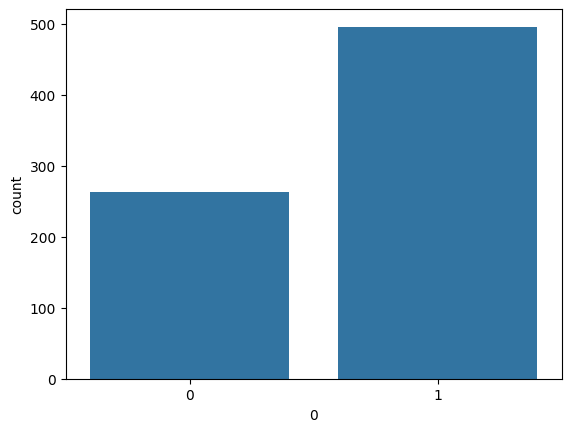

In [34]:

import seaborn as sns

outputs = pd.DataFrame(dataset_new.iloc[:, -1].values)

sns.countplot(x=outputs[0],data = outputs)

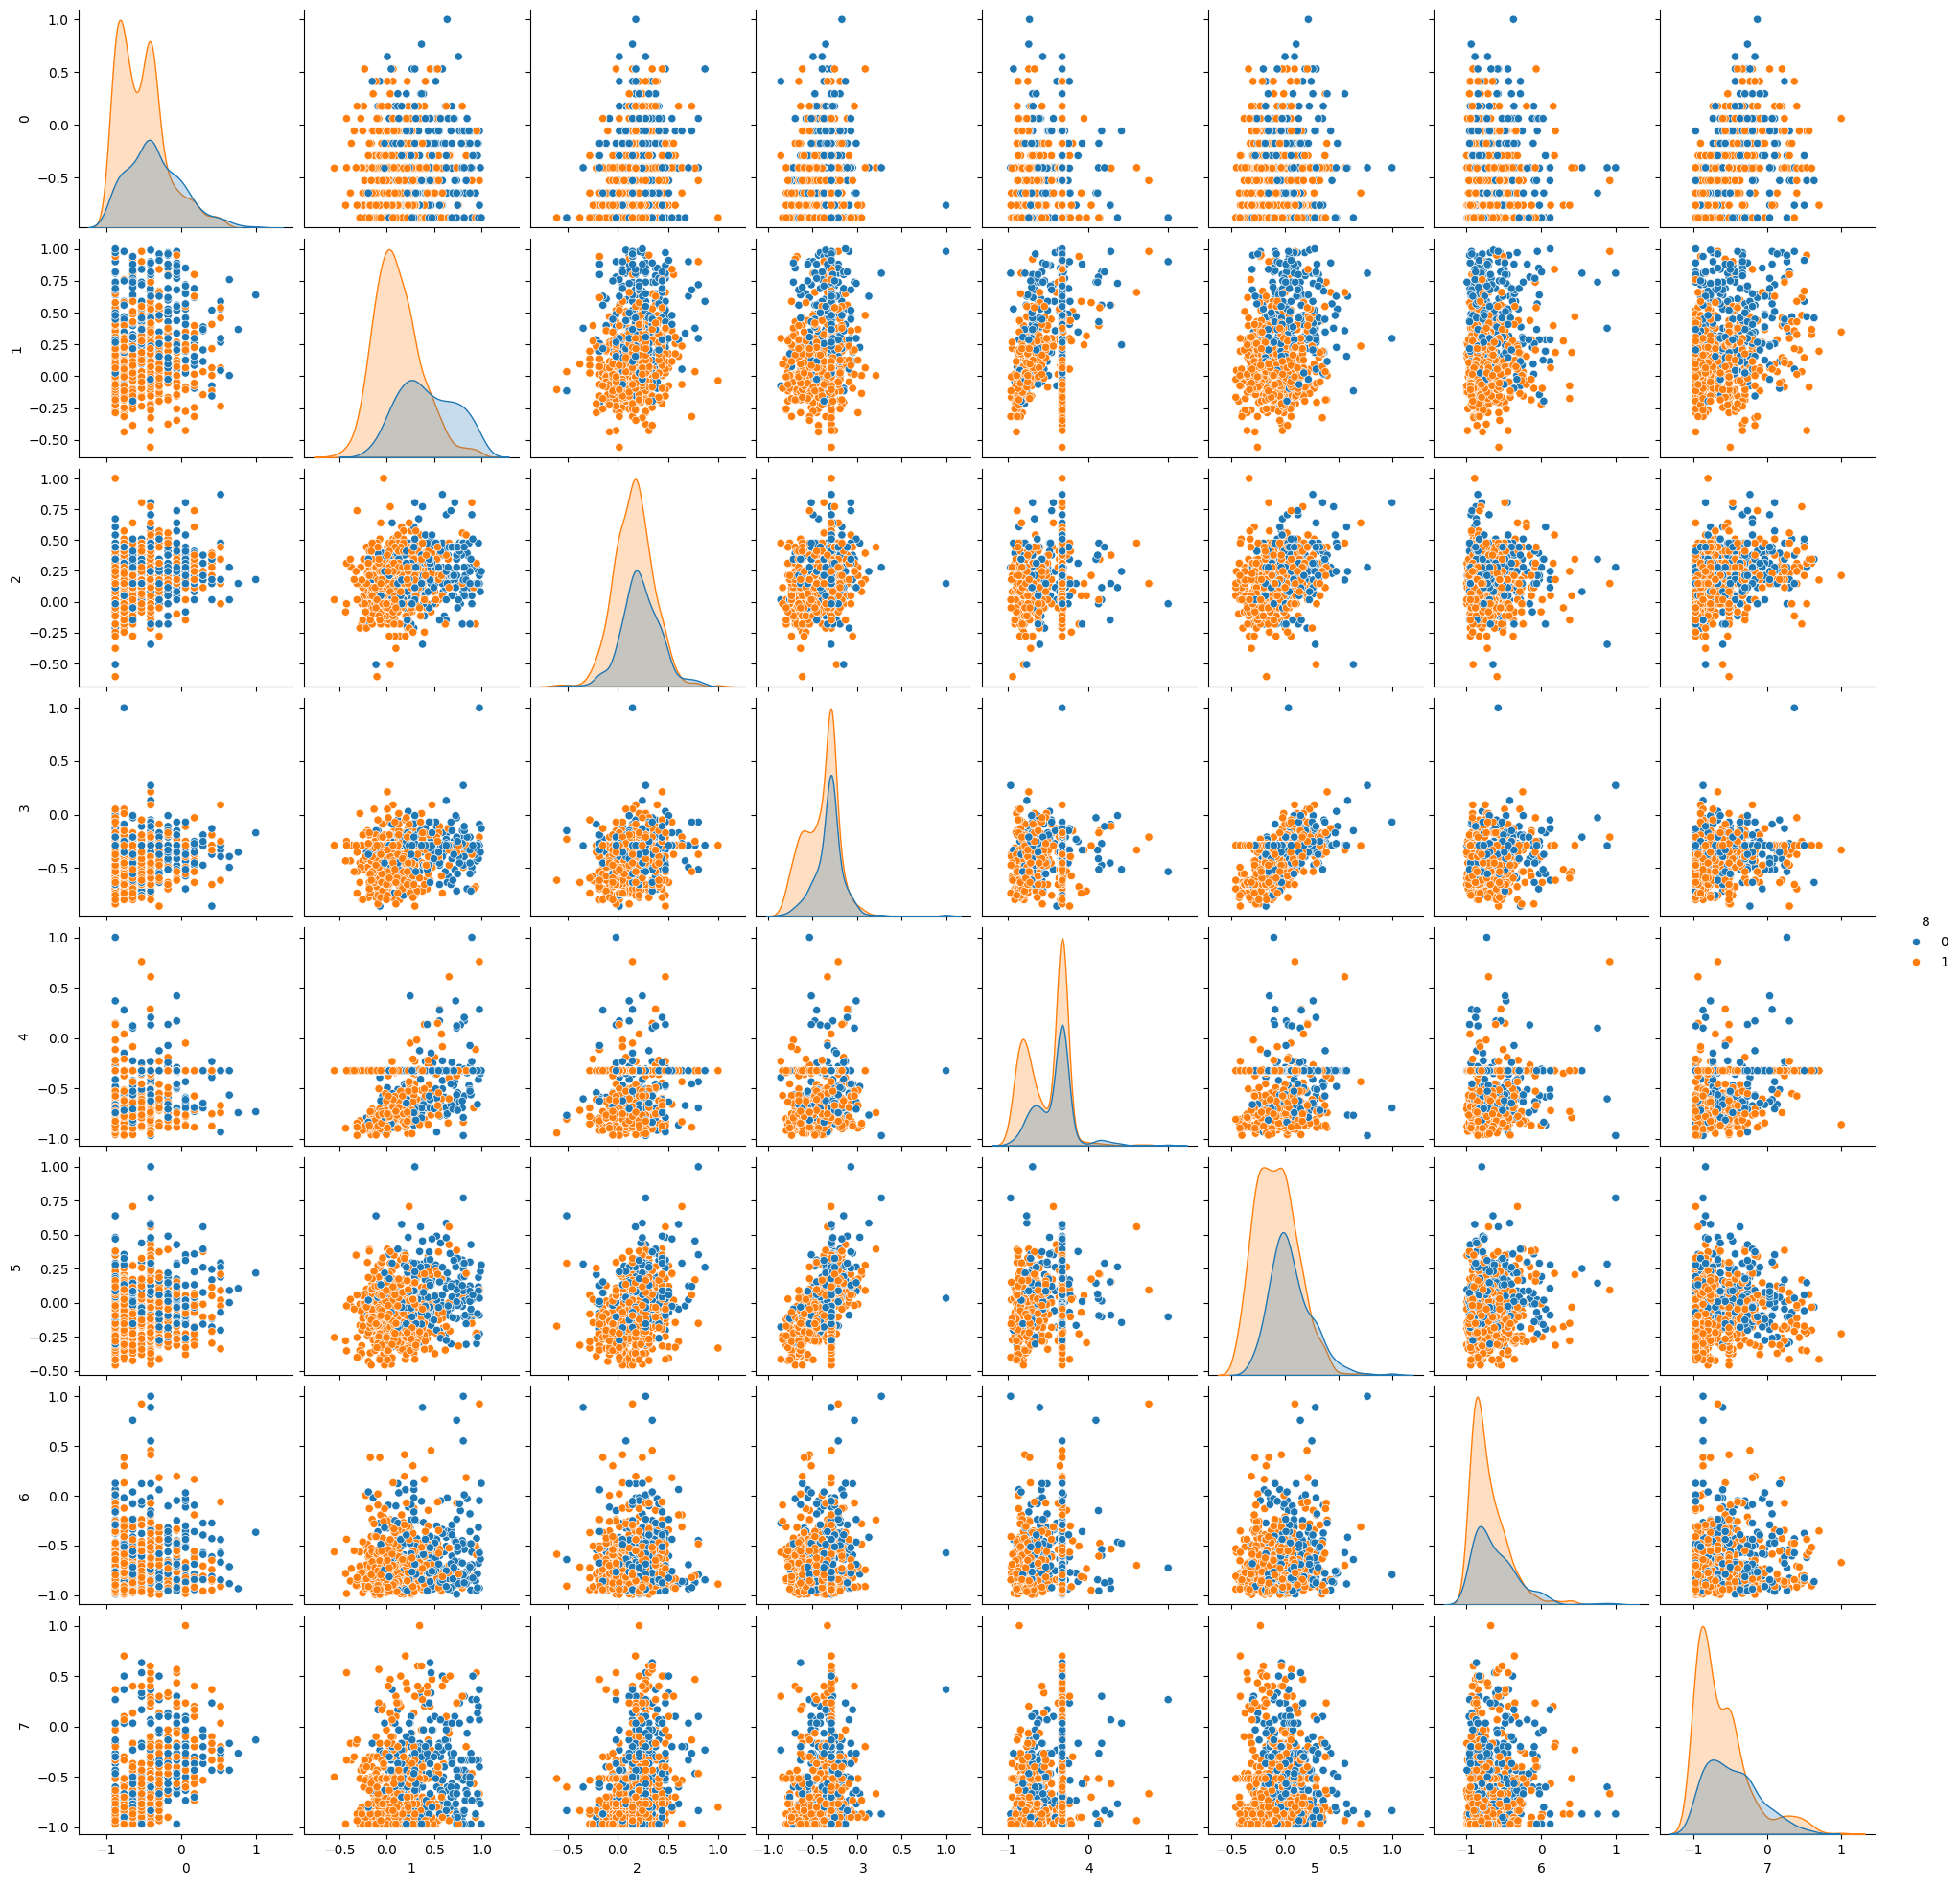

In [35]:
# Pairplot
sns.pairplot(data = dataset_new, hue = 8)
plt.show()

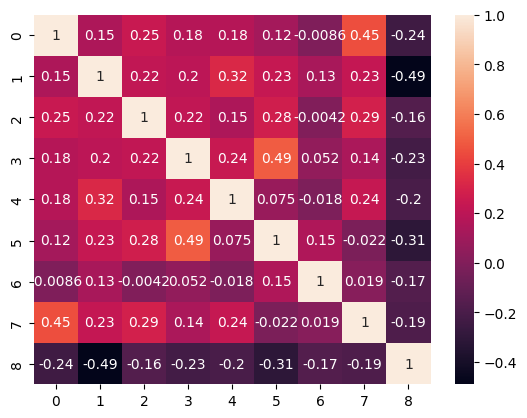

In [36]:
sns.heatmap(dataset_new.corr(), annot = True)
plt.show()

# **Step 3. Split into 80% train 20% test**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = dataset_new.iloc[:, :-1].values
y = dataset_new.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## **PART 1 : USING TENSORFLOW**

# **Step 4. Create the Base model**

The Base model is created with sigmoid activation function and SGD optimizer along with binary_crossentropy as the Y Column is binary (0 or 1)

In [38]:
# Create a linear model


base_model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')])

base_model.compile(optimizer='SGD',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


# **Step 5. Train the model**

In [39]:
base_model.fit(X_train, y_train, epochs=2)

Epoch 1/2
19/19 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6886
Epoch 2/2
19/19 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6639


# **Step 6. Make predictions on the test data and compare them to the test labels**

5/5 [==============================] - 0s 3ms/step


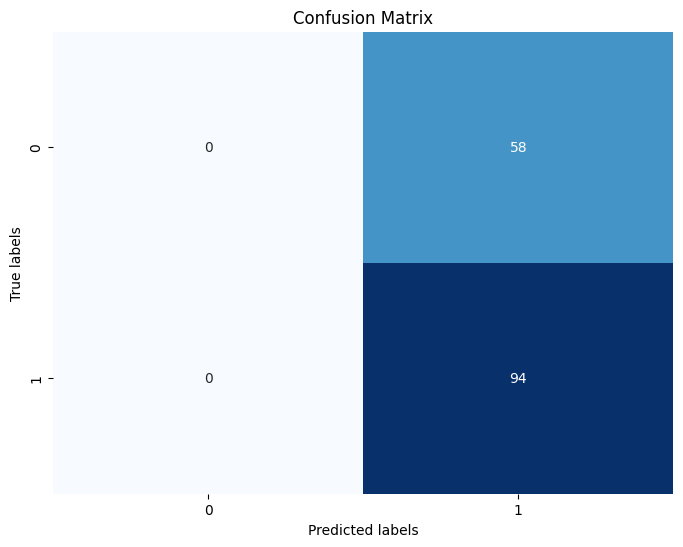

In [40]:
# Predict using the model
base_model_predict = (base_model.predict(X_test) > 0.5).astype("int32")

# Create confusion matrix
cm1 = confusion_matrix(y_test, base_model_predict)


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# **Step 7. Calculate the accuracy**

In [41]:
# Calculate accuracy
accuracy = np.mean(base_model_predict.flatten() == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.618421052631579


# **Step 8. Hypothesize Testing**

*`i) Increasing the depth to 3 , epochs to 25 and Adam optimizer :`*

Epoch 1/25
19/19 [==============================] - 1s 2ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 2/25
19/19 [==============================] - 0s 2ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 3/25
19/19 [==============================] - 0s 3ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 4/25
19/19 [==============================] - 0s 3ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 5/25
19/19 [==============================] - 0s 3ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 6/25
19/19 [==============================] - 0s 3ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 7/25
19/19 [==============================] - 0s 2ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 8/25
19/19 [==============================] - 0s 2ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 9/25
19/19 [==============================] - 0s 3ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 10/25
19/19 [==============================] - 0s 2ms/step - loss: 10.2155 - accuracy: 0.3377
Epoch 11/

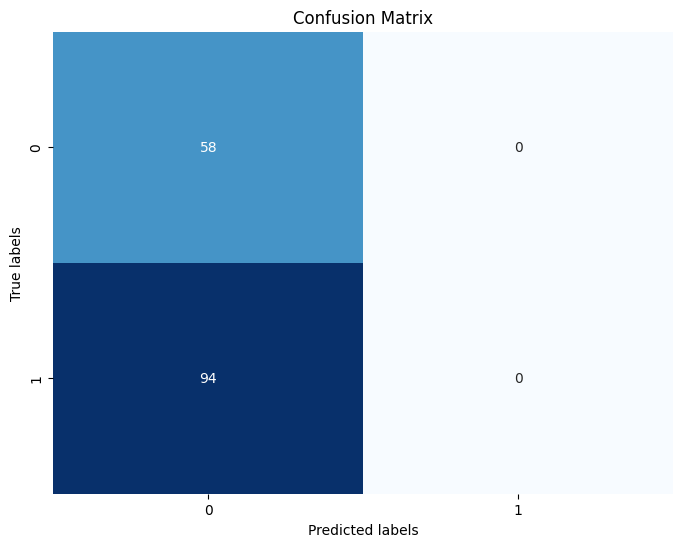

Accuracy: 0.3815789473684211


In [42]:

# Deep Model
linear_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid'),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

linear_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(X_train, y_train, epochs=25)
linear_predict = (linear_model.predict(X_test) > 0.5).astype("int32")


cm2 = confusion_matrix(y_test, linear_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = np.mean(linear_predict.flatten() == y_test)
print("Accuracy:", accuracy)



```
ii) Increasing the depth to 4 , epochs to 40 and Adam optimizer :
```

Epoch 1/40
19/19 [==============================] - 3s 6ms/step - loss: 0.8149 - accuracy: 0.3460
Epoch 2/40
19/19 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6623
Epoch 3/40
19/19 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6623
Epoch 4/40
19/19 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.6623
Epoch 5/40
19/19 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6623
Epoch 6/40
19/19 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6623
Epoch 7/40
19/19 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6623
Epoch 8/40
19/19 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6623
Epoch 9/40
19/19 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6623
Epoch 10/40
19/19 [==============================] - 0s 2ms/step - loss: 0.5970 - accuracy: 0.6623
Epoch 11/40
19/19 [

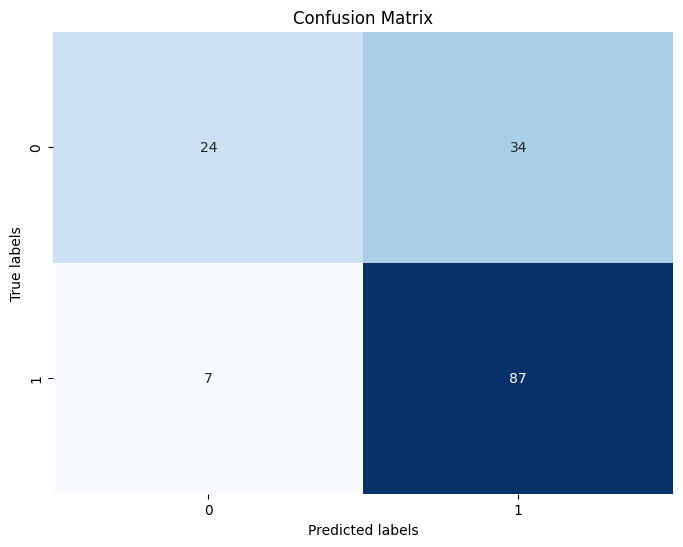

Accuracy: 0.7302631578947368


In [43]:

# Deep Model
linear_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid'),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(16,activation='sigmoid'),
                                    tf.keras.layers.Dense(1)
                                    ])

linear_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(X_train, y_train, epochs=40)
linear_predict = (linear_model.predict(X_test) > 0.5).astype("int32")


cm3 = confusion_matrix(y_test, linear_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = np.mean(linear_predict.flatten() == y_test)
print("Accuracy:", accuracy)

`iii) Increasing the depth to 5 , epochs to 140 and Adam optimizer `

Epoch 1/140
19/19 [==============================] - 1s 3ms/step - loss: 0.7106 - accuracy: 0.5585
Epoch 2/140
19/19 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6623
Epoch 3/140
19/19 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6623
Epoch 4/140
19/19 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.6623
Epoch 5/140
19/19 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.6623
Epoch 6/140
19/19 [==============================] - 0s 4ms/step - loss: 0.6252 - accuracy: 0.6639
Epoch 7/140
19/19 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.6672
Epoch 8/140
19/19 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6919
Epoch 9/140
19/19 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.6870
Epoch 10/140
19/19 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7100
Epoch 11/

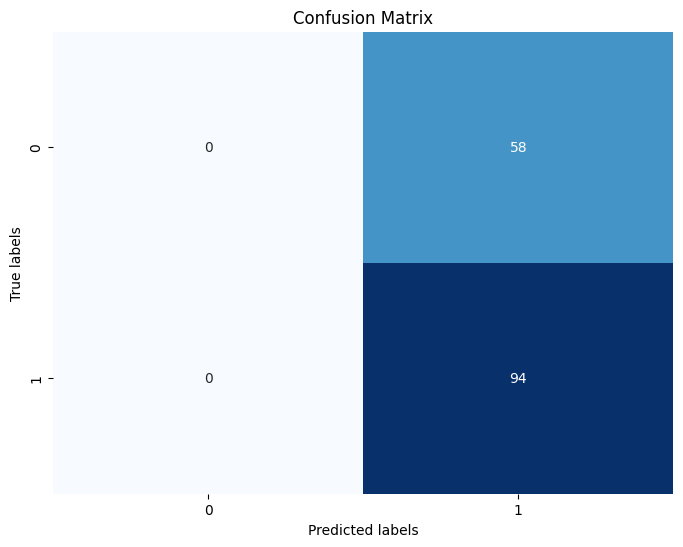

Accuracy: 0.618421052631579


In [44]:

# Deep Model
linear_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(64,activation='sigmoid'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='sigmoid'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

linear_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(X_train, y_train, epochs=140)
linear_predict = (linear_model.predict(X_test) > 0.5).astype("int32")

cm3 = confusion_matrix(y_test, linear_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = np.mean(linear_predict.flatten() == y_test)
print("Accuracy:", accuracy)

#  PART 2: USING PYTORCH

# **Step 4. Create the Base model using PyTorch**

In [20]:
import torch.nn as nn
import torch
import torch.optim as optim


lm = nn.Sequential(
    nn.Linear(8, 1),
    nn.Sigmoid()   )


criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.SGD(lm.parameters(), lr=0.01)



# **Step 5. Train the model**

In [21]:

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)



num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0


    outputs = lm(X_train_tensor)
    outputs = torch.sigmoid(outputs)


    loss = criterion(outputs, y_train_tensor.view(-1, 1))


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predictions = (outputs > 0.5).float()


    correct_predictions += (predictions == y_train_tensor.view(-1, 1)).sum().item()

    # Calculate accuracy
    accuracy = correct_predictions / len(y_train_tensor)


    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/30], Loss: 0.6611, Accuracy: 0.6442
Epoch [2/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [3/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [4/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [5/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [6/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [7/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [8/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [9/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [10/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [11/30], Loss: 0.6610, Accuracy: 0.6442
Epoch [12/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [13/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [14/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [15/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [16/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [17/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [18/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [19/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [20/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [21/30], Loss: 0.6609, Accuracy: 0.6442
Epoch [22/30], Loss: 0.6608, Accuracy: 0.64

# **Step 6. Make predictions on the test data and compare them to the test labels**

In [22]:

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Evaluate the model on test data
test_outputs = lm(X_test_tensor)


# **Step 7 : Calculate accuracy**

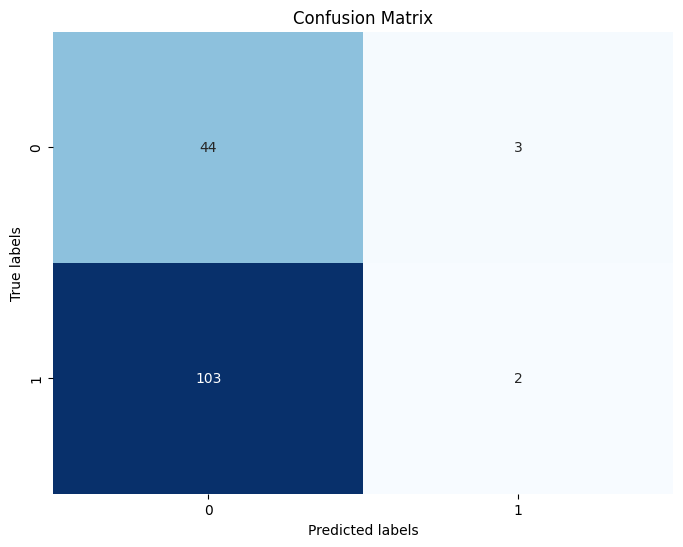

Test Accuracy: 0.30263158679008484


In [23]:


test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))

predictions = (test_outputs > 0.5).float()

# confusion matrix
cm4 = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# accuracy
accuracy = (predictions == y_test_tensor.view(-1, 1)).float().mean().item()
print("Test Accuracy:", accuracy)


# **Step 8 : Hypothesis Testing**



```
i) Increased depth to 5 and neurons to 32 , Adam optimizer and epoch 15 :
```



Epoch [1/15], Loss: 0.6510, Accuracy: 0.6442
Epoch [2/15], Loss: 0.6642, Accuracy: 0.6442
Epoch [3/15], Loss: 0.6522, Accuracy: 0.6442
Epoch [4/15], Loss: 0.6611, Accuracy: 0.3558
Epoch [5/15], Loss: 0.6538, Accuracy: 0.3558
Epoch [6/15], Loss: 0.6516, Accuracy: 0.6442
Epoch [7/15], Loss: 0.6534, Accuracy: 0.6442
Epoch [8/15], Loss: 0.6529, Accuracy: 0.6442
Epoch [9/15], Loss: 0.6515, Accuracy: 0.6442
Epoch [10/15], Loss: 0.6511, Accuracy: 0.6442
Epoch [11/15], Loss: 0.6517, Accuracy: 0.6442
Epoch [12/15], Loss: 0.6520, Accuracy: 0.6442
Epoch [13/15], Loss: 0.6515, Accuracy: 0.6442
Epoch [14/15], Loss: 0.6510, Accuracy: 0.6442
Epoch [15/15], Loss: 0.6508, Accuracy: 0.6442


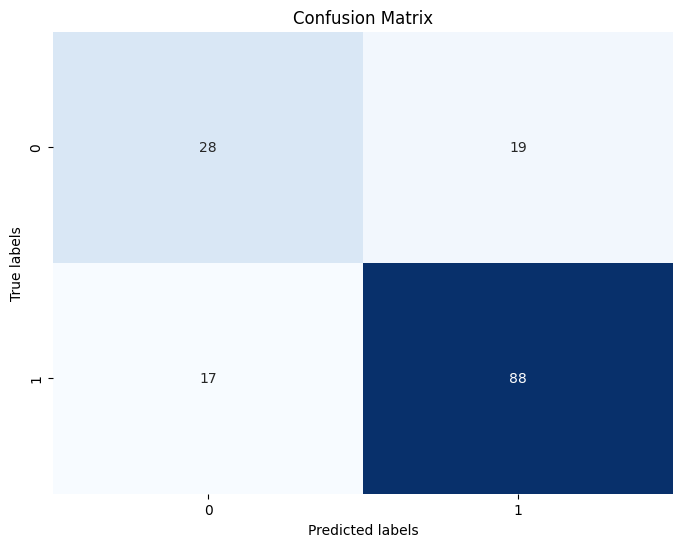

Test Accuracy: 0.7631579041481018


In [24]:

lm = nn.Sequential(
    nn.Linear(8, 32),
    nn.Sigmoid(),
    nn.Linear(32, 32),
    nn.Sigmoid(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.Sigmoid(),
    nn.Linear(32, 1)
)

# Binary cross-entropy loss
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(lm.parameters(), lr=0.1)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


num_epochs = 15
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0


    outputs = lm(X_train_tensor)
    outputs = torch.sigmoid(outputs)


    loss = criterion(outputs, y_train_tensor.view(-1, 1))


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predictions = (outputs > 0.5).float()


    correct_predictions += (predictions == y_train_tensor.view(-1, 1)).sum().item()


    accuracy = correct_predictions / len(y_train_tensor)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

# Evaluate the model on test data
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_outputs = lm(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
predictions = (test_outputs > 0.5).float()


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Calculate accuracy
accuracy = (predictions == y_test_tensor.view(-1, 1)).float().mean().item()
print("Test Accuracy:", accuracy)




```
ii) Descreased depth and increased neurons to 64 , Adam optimizer and epoch 120 :
```



Epoch [1/120], Loss: 0.6510, Accuracy: 0.6442
Epoch [2/120], Loss: 0.6512, Accuracy: 0.6442
Epoch [3/120], Loss: 0.6503, Accuracy: 0.6442
Epoch [4/120], Loss: 0.6501, Accuracy: 0.6442
Epoch [5/120], Loss: 0.6492, Accuracy: 0.6442
Epoch [6/120], Loss: 0.6478, Accuracy: 0.6442
Epoch [7/120], Loss: 0.6463, Accuracy: 0.6442
Epoch [8/120], Loss: 0.6440, Accuracy: 0.6919
Epoch [9/120], Loss: 0.6406, Accuracy: 0.6919
Epoch [10/120], Loss: 0.6362, Accuracy: 0.6853
Epoch [11/120], Loss: 0.6305, Accuracy: 0.7100
Epoch [12/120], Loss: 0.6234, Accuracy: 0.7249
Epoch [13/120], Loss: 0.6154, Accuracy: 0.7232
Epoch [14/120], Loss: 0.6070, Accuracy: 0.7232
Epoch [15/120], Loss: 0.5992, Accuracy: 0.7232
Epoch [16/120], Loss: 0.5923, Accuracy: 0.7199
Epoch [17/120], Loss: 0.5868, Accuracy: 0.7150
Epoch [18/120], Loss: 0.5828, Accuracy: 0.7265
Epoch [19/120], Loss: 0.5795, Accuracy: 0.7133
Epoch [20/120], Loss: 0.5770, Accuracy: 0.7166
Epoch [21/120], Loss: 0.5752, Accuracy: 0.7232
Epoch [22/120], Loss: 

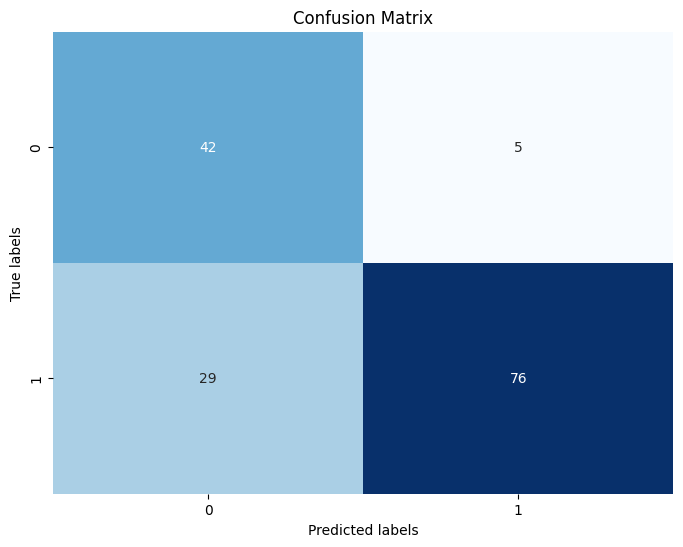

Test Accuracy: 0.7763158082962036


In [25]:

lm = nn.Sequential(
    nn.Linear(8, 64),
    nn.Sigmoid(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)



criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(lm.parameters(), lr=0.01)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)


num_epochs = 120
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0


    outputs = lm(X_train_tensor)
    outputs = torch.sigmoid(outputs)


    loss = criterion(outputs, y_train_tensor.view(-1, 1))


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predictions = (outputs > 0.5).float()
    correct_predictions += (predictions == y_train_tensor.view(-1, 1)).sum().item()

    accuracy = correct_predictions / len(y_train_tensor)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')


X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_outputs = lm(X_test_tensor)
test_loss = criterion(test_outputs, y_test_tensor.view(-1, 1))
predictions = (test_outputs > 0.5).float()


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



accuracy = (predictions == y_test_tensor.view(-1, 1)).float().mean().item()
print("Test Accuracy:", accuracy)


# **Hypothesis Results and Discussion**

`PART 1 Using Tensorflow`


1) binary_crossentropy is used as the target (Y) is binary (0 or 1)


2) Hypothesis C's accuracy falls considerably, suggesting potential overfitting due to its increasing complexity.

3) Hypothesis A performs better than C, suggesting that too much complexity (64 neurons per layer) may lead to poor generalization,
especially for this dataset.

4) Increasing model complexity beyond a particular point (as mentioned in Hypothesis C) may lead to overfitting and decreased performance.

`Part 2 Using Pytorch`

1) Adam optimizer seems to perform better than SGD for this particular dataset

2) Increasing the model depth from 3 to 5 layers with 32 neurons per layer increased accuracy from 0.30 to 0.78.

3) Adding too many neurons might cause overfitting because the model may become too complicated and recall the training data instead of learning generalizable patterns.